# Medical Insurance Cost Prediction

## Objective
- Predict Medical Insurance Cost for each citizen

## Metadata

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance (Target)

## Pipeline

1. Import Necessary libraries
2. Data Collection
3. Exploratory Data Analysis
4. Preprocessing
5. Splitting
6. Training and prediction
7. Validation
8. Evaluation

### Import Necessary libraries

In [59]:
# Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Collection

In [2]:
insurance = pd.read_csv('/mnt/d/Self_Study/DEPI/4-ML/datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [3]:
# number of rows and columns
insurance.shape

(1338, 7)

In [4]:
insurance.info()
# 1338 entries(rows), 7 columns
# 4 Numerical Columns, 3 Object Columns
# Numerical Columns
# 1. age
# 2. bmi
# 3. children
# 4. charges
# Object Columns
# 1. sex
# 2. smoker
# 3. region


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for missing values
insurance.isnull().sum()
# No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

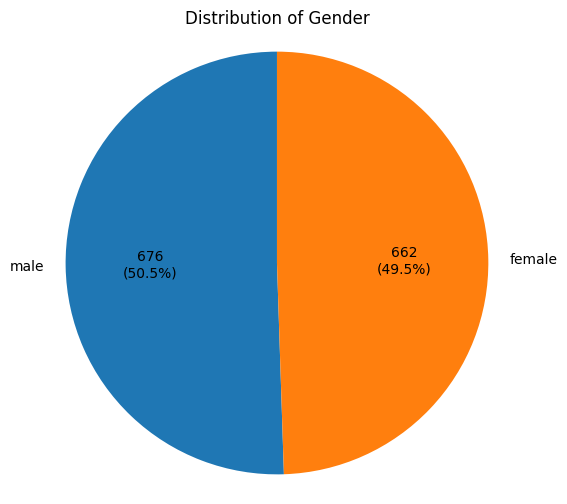

In [6]:
# Visualize Distribution of Gender piechart with count and percentage
fig = plt.figure(figsize=(6,6))
gender_counts = insurance['sex'].value_counts()
total = sum(gender_counts)

def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return '{:d}\n({:.1f}%)'.format(count, pct)
    return my_autopct

plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct=make_autopct(gender_counts),
    startangle=90
)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

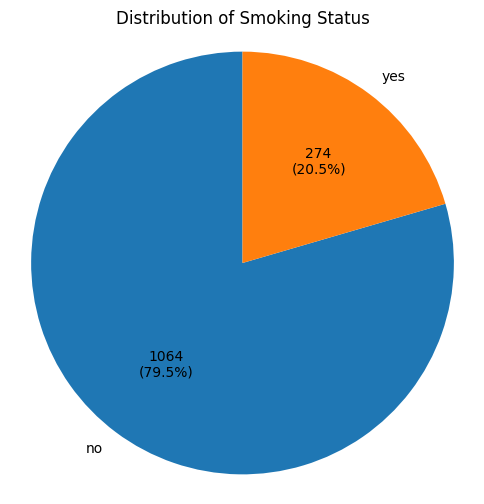

In [7]:
# Visualize Distribution of smoking
fig = plt.figure(figsize=(6,6))
smoking_counts = insurance['smoker'].value_counts()
total = sum(smoking_counts)



plt.pie(
    smoking_counts, 
    labels=smoking_counts.index, 
    autopct=make_autopct(smoking_counts),
    startangle=90
)
plt.title('Distribution of Smoking Status')
plt.axis('equal')
plt.show()

In [8]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
# statistical Measures of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


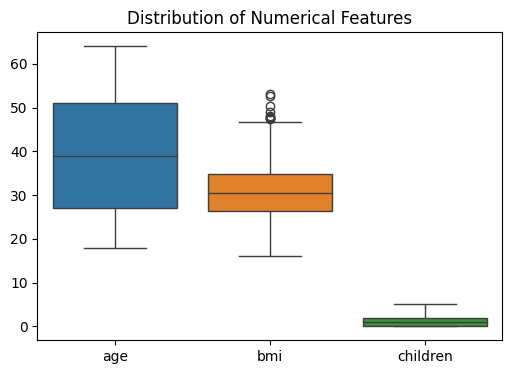

In [34]:
#Visualize numerical features
numerical_features = insurance.iloc[:, :-1].select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(6, 4))
sns.boxplot(data=insurance[numerical_features])
plt.title(f'Distribution of Numerical Features')
plt.show()

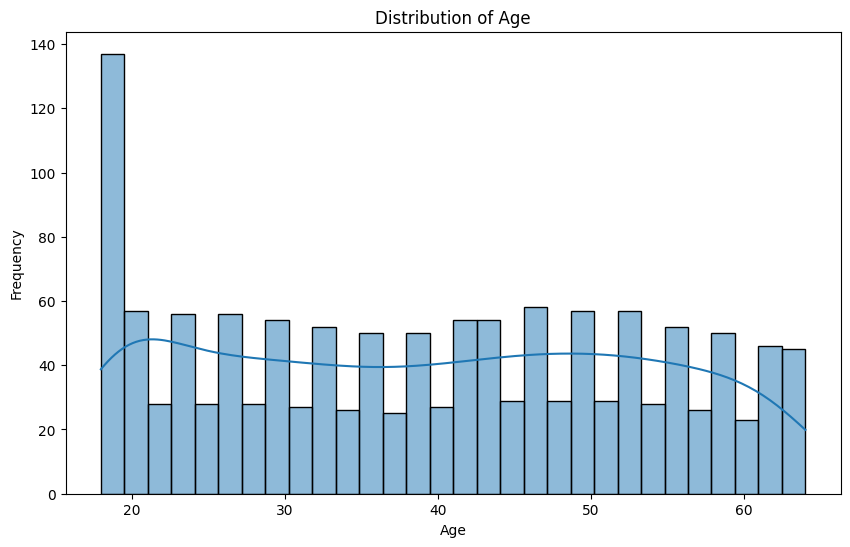

In [11]:
#distribution of age
plt.figure(figsize=(10,6))
sns.histplot(insurance['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

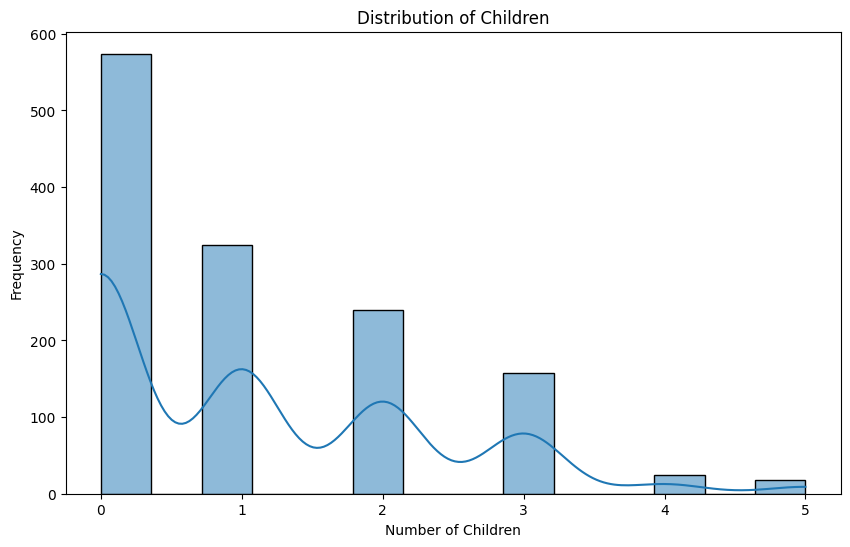

In [13]:
# Distribution of children
fig = plt.figure(figsize=(10,6))
sns.histplot(insurance['children'], kde=True)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

In [14]:
#group people who have children with their insurance charges
children_insurance = insurance[insurance['children'] > 0].groupby('children')['charges'].mean().reset_index()
children_insurance


,children,charges
0,1,12731.171832
1,2,15073.563734
2,3,15355.318367
3,4,13850.656311
4,5,8786.035247


/tmp/ipykernel_17584/3621969568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=children_insurance,palette="tab10")


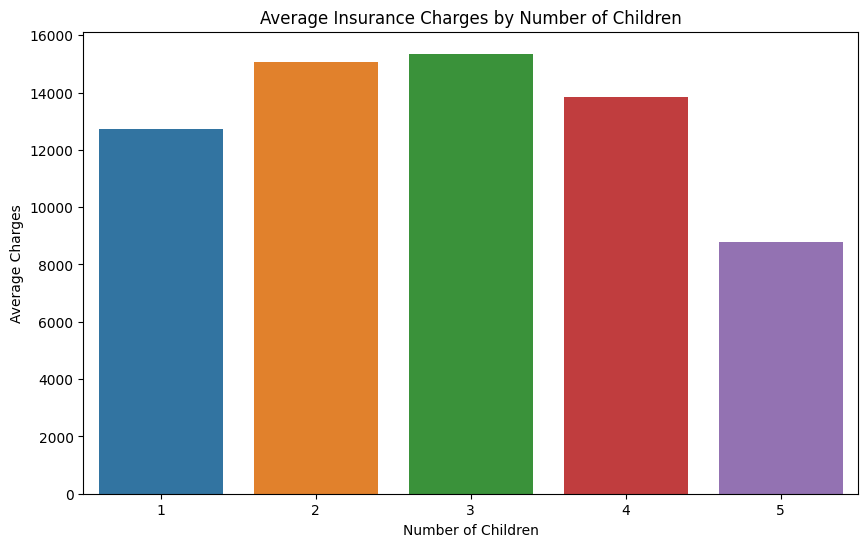

In [57]:
# visualize it
plt.figure(figsize=(10,6))
sns.barplot(x='children', y='charges', data=children_insurance,palette="tab10")
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [16]:
# Group people who smoke and donot smoke with their insurance charges
smoking_insurance = insurance[insurance['smoker'] == 'yes'].groupby('smoker')['charges'].mean().reset_index()
non_smoking_insurance = insurance[insurance['smoker'] == 'no'].groupby('smoker')['charges'].mean().reset_index()
pd.DataFrame({'Smoking': smoking_insurance['charges'], 'Non-Smoking': non_smoking_insurance['charges']})

,Smoking,Non-Smoking
0,32050.231832,8434.268298


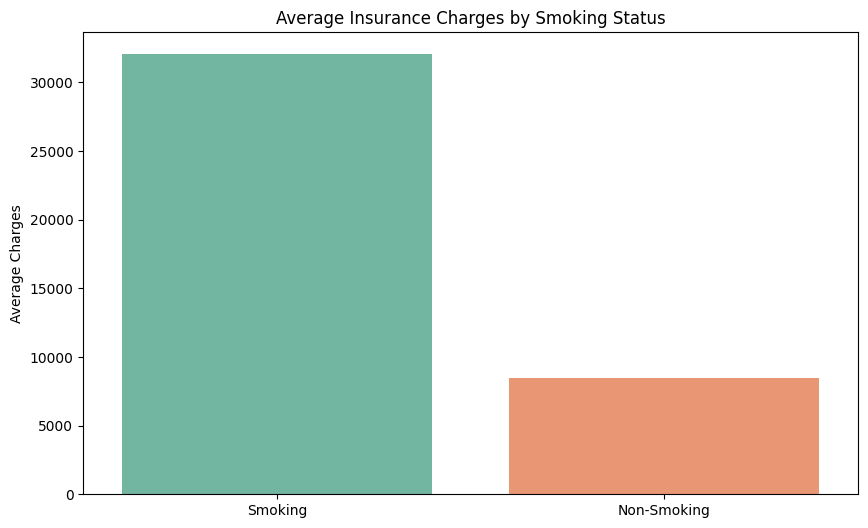

In [17]:
#visualize it
plt.figure(figsize=(10,6))
sns.barplot(data=pd.DataFrame({'Smoking': smoking_insurance['charges'], 'Non-Smoking': non_smoking_insurance['charges']}),palette="Set2")
plt.title('Average Insurance Charges by Smoking Status')
plt.ylabel('Average Charges')
plt.show()

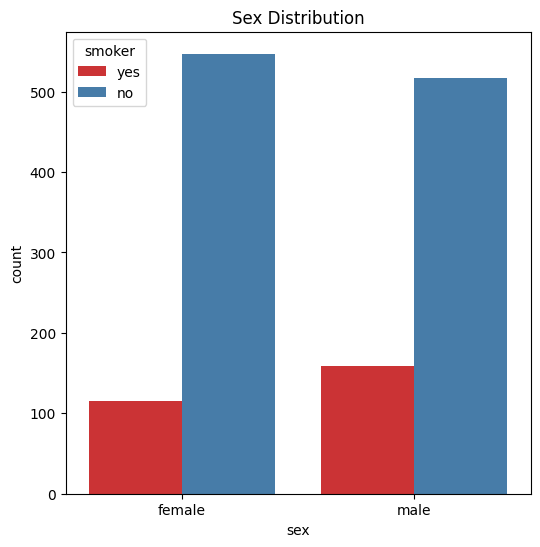

In [19]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance, hue='smoker', palette='Set1')
plt.title('Sex Distribution')
plt.show()

In [20]:
#distribution of males and females who smoke and not by their charges (Rows: male and female), Columns(Smoke and non-smoking)
smoking_gender = insurance[insurance['smoker'] == 'yes'].groupby('sex')['charges'].mean().reset_index()
non_smoking_gender = insurance[insurance['smoker'] == 'no'].groupby('sex')['charges'].mean().reset_index()
pd.DataFrame({'Smoking': smoking_gender['charges'], 'Non-Smoking': non_smoking_gender['charges']})

,Smoking,Non-Smoking
0,30678.996276,8762.297300
1,33042.005975,8087.204731


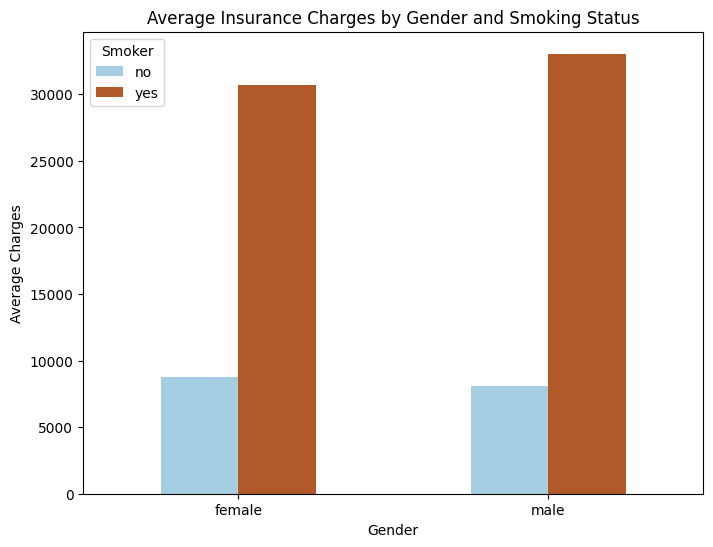

In [21]:
# Distribution of males and females who smoke and not by their charges (Rows: male and female, Columns: Smoke and non-smoking)
charges_by_gender_smoker = insurance.groupby(['sex', 'smoker'])['charges'].mean().unstack()

charges_by_gender_smoker.plot(kind='bar', figsize=(8,6),colormap="Paired")
plt.title('Average Insurance Charges by Gender and Smoking Status')
plt.ylabel('Average Charges')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Smoker')
plt.show()

/tmp/ipykernel_1019/3937158584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'region', data=insurance, palette='Set1')


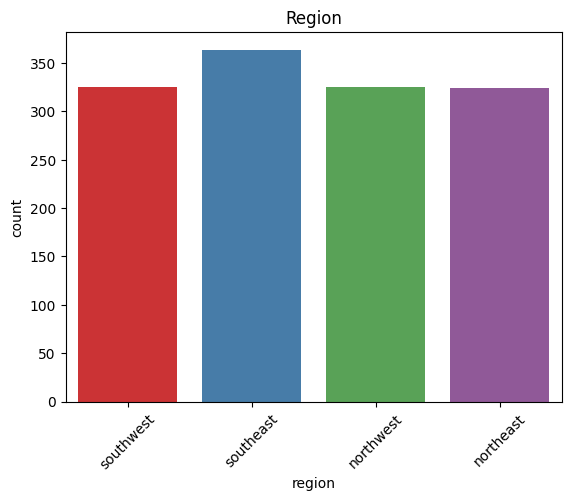

In [22]:
# Region column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'region', data=insurance, palette='Set1')
plt.title('Region')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1019/2039609822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=insurance,palette="Set3")


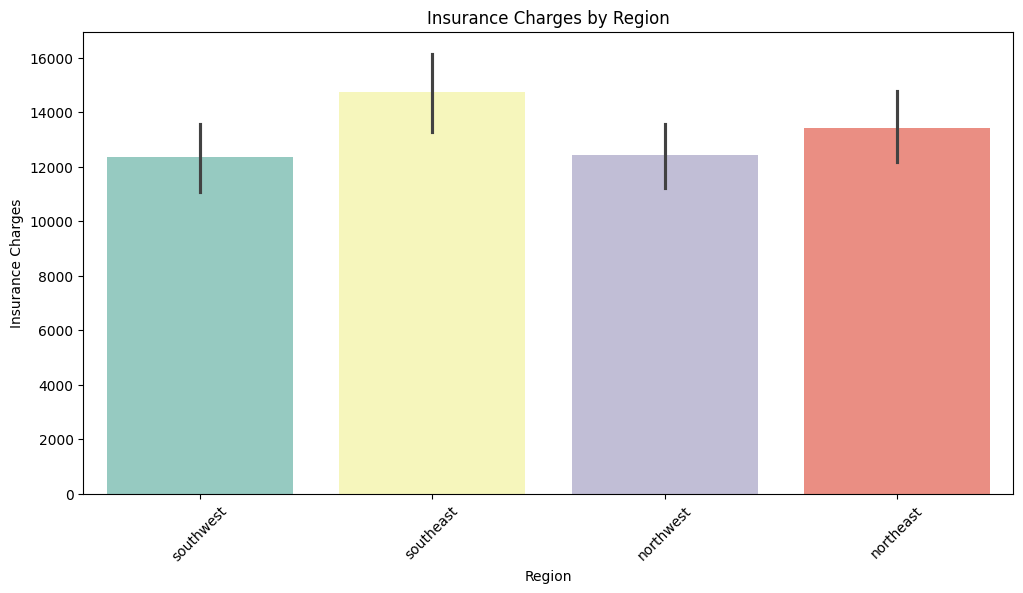

In [26]:
#visualize Regions with their charges
fig = plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', data=insurance,palette="Set3")
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()


### Preprocessing

### Planned Enhancements for Better Prediction
- Feature scaling (Standardization)
- Feature engineering (polynomial features, log-transform)
- Hyperparameter tuning (GridSearchCV)
- Ensemble methods (Random Forest, Gradient Boosting, XGBoost)
- Cross-validation
- Outlier handling

In [3]:
# Check Categorical & Numerical features
num_cols = insurance.iloc[:,:-1].select_dtypes(include= np.number).columns.tolist()

cat_cols = insurance.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns are: {num_cols}")
print(f"Categorical Columns are: {cat_cols}")

Numerical Columns are: ['age', 'bmi', 'children']
Categorical Columns are: ['sex', 'smoker', 'region']


In [4]:
# Check Duplicates
duplicates = insurance[insurance.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

#remove them
insurance = insurance.drop_duplicates()
print("successfully Duplicates removed")

Number of duplicate rows: 1
successfully Duplicates removed


In [5]:
#Encoding Categorical features
# Encoding sex column
insurance.replace({
    'sex':{
        'male':0,
        'female':1
    }}, inplace= True)

# Encoding smoker column
insurance.replace({
    'smoker':{
        'no':0,
        'yes':1
    }}, inplace= True)

# Encoding region column
insurance.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':2,
        'northeast':3
    }}, inplace= True)

insurance.head()

/tmp/ipykernel_810/1744634649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({
/tmp/ipykernel_810/1744634649.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({
/tmp/ipykernel_810/1744634649.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replac

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


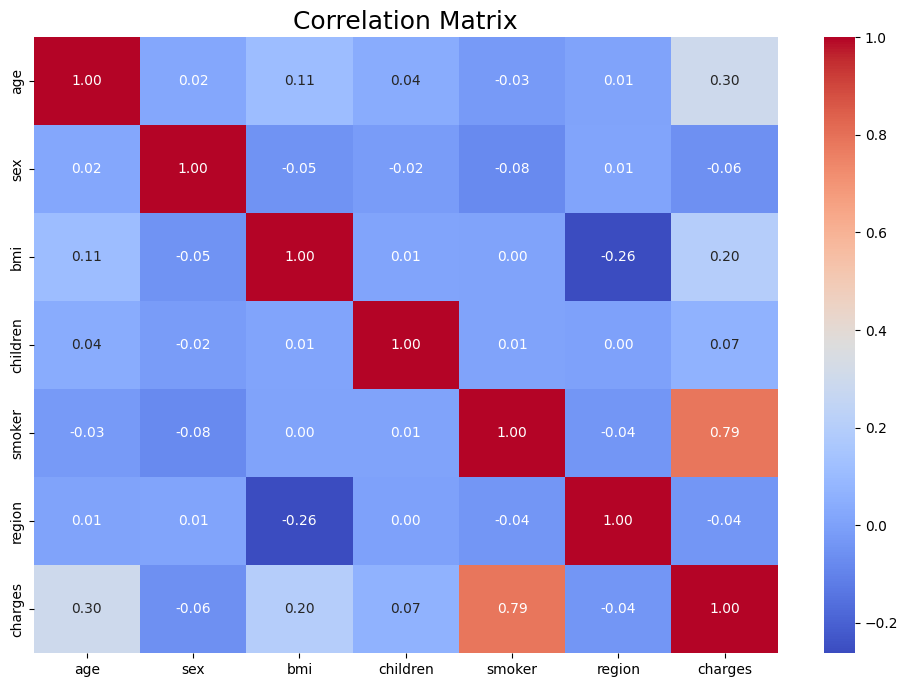

In [6]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(insurance.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [66]:
insurance.shape

(1337, 7)

### Splitting

In [51]:
X= insurance.drop(columns='charges', axis=1)
y= insurance['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1002, 6) (335, 6)


### Training and Prediction

In [53]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [55]:
# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [72]:
# Decision Tree 
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


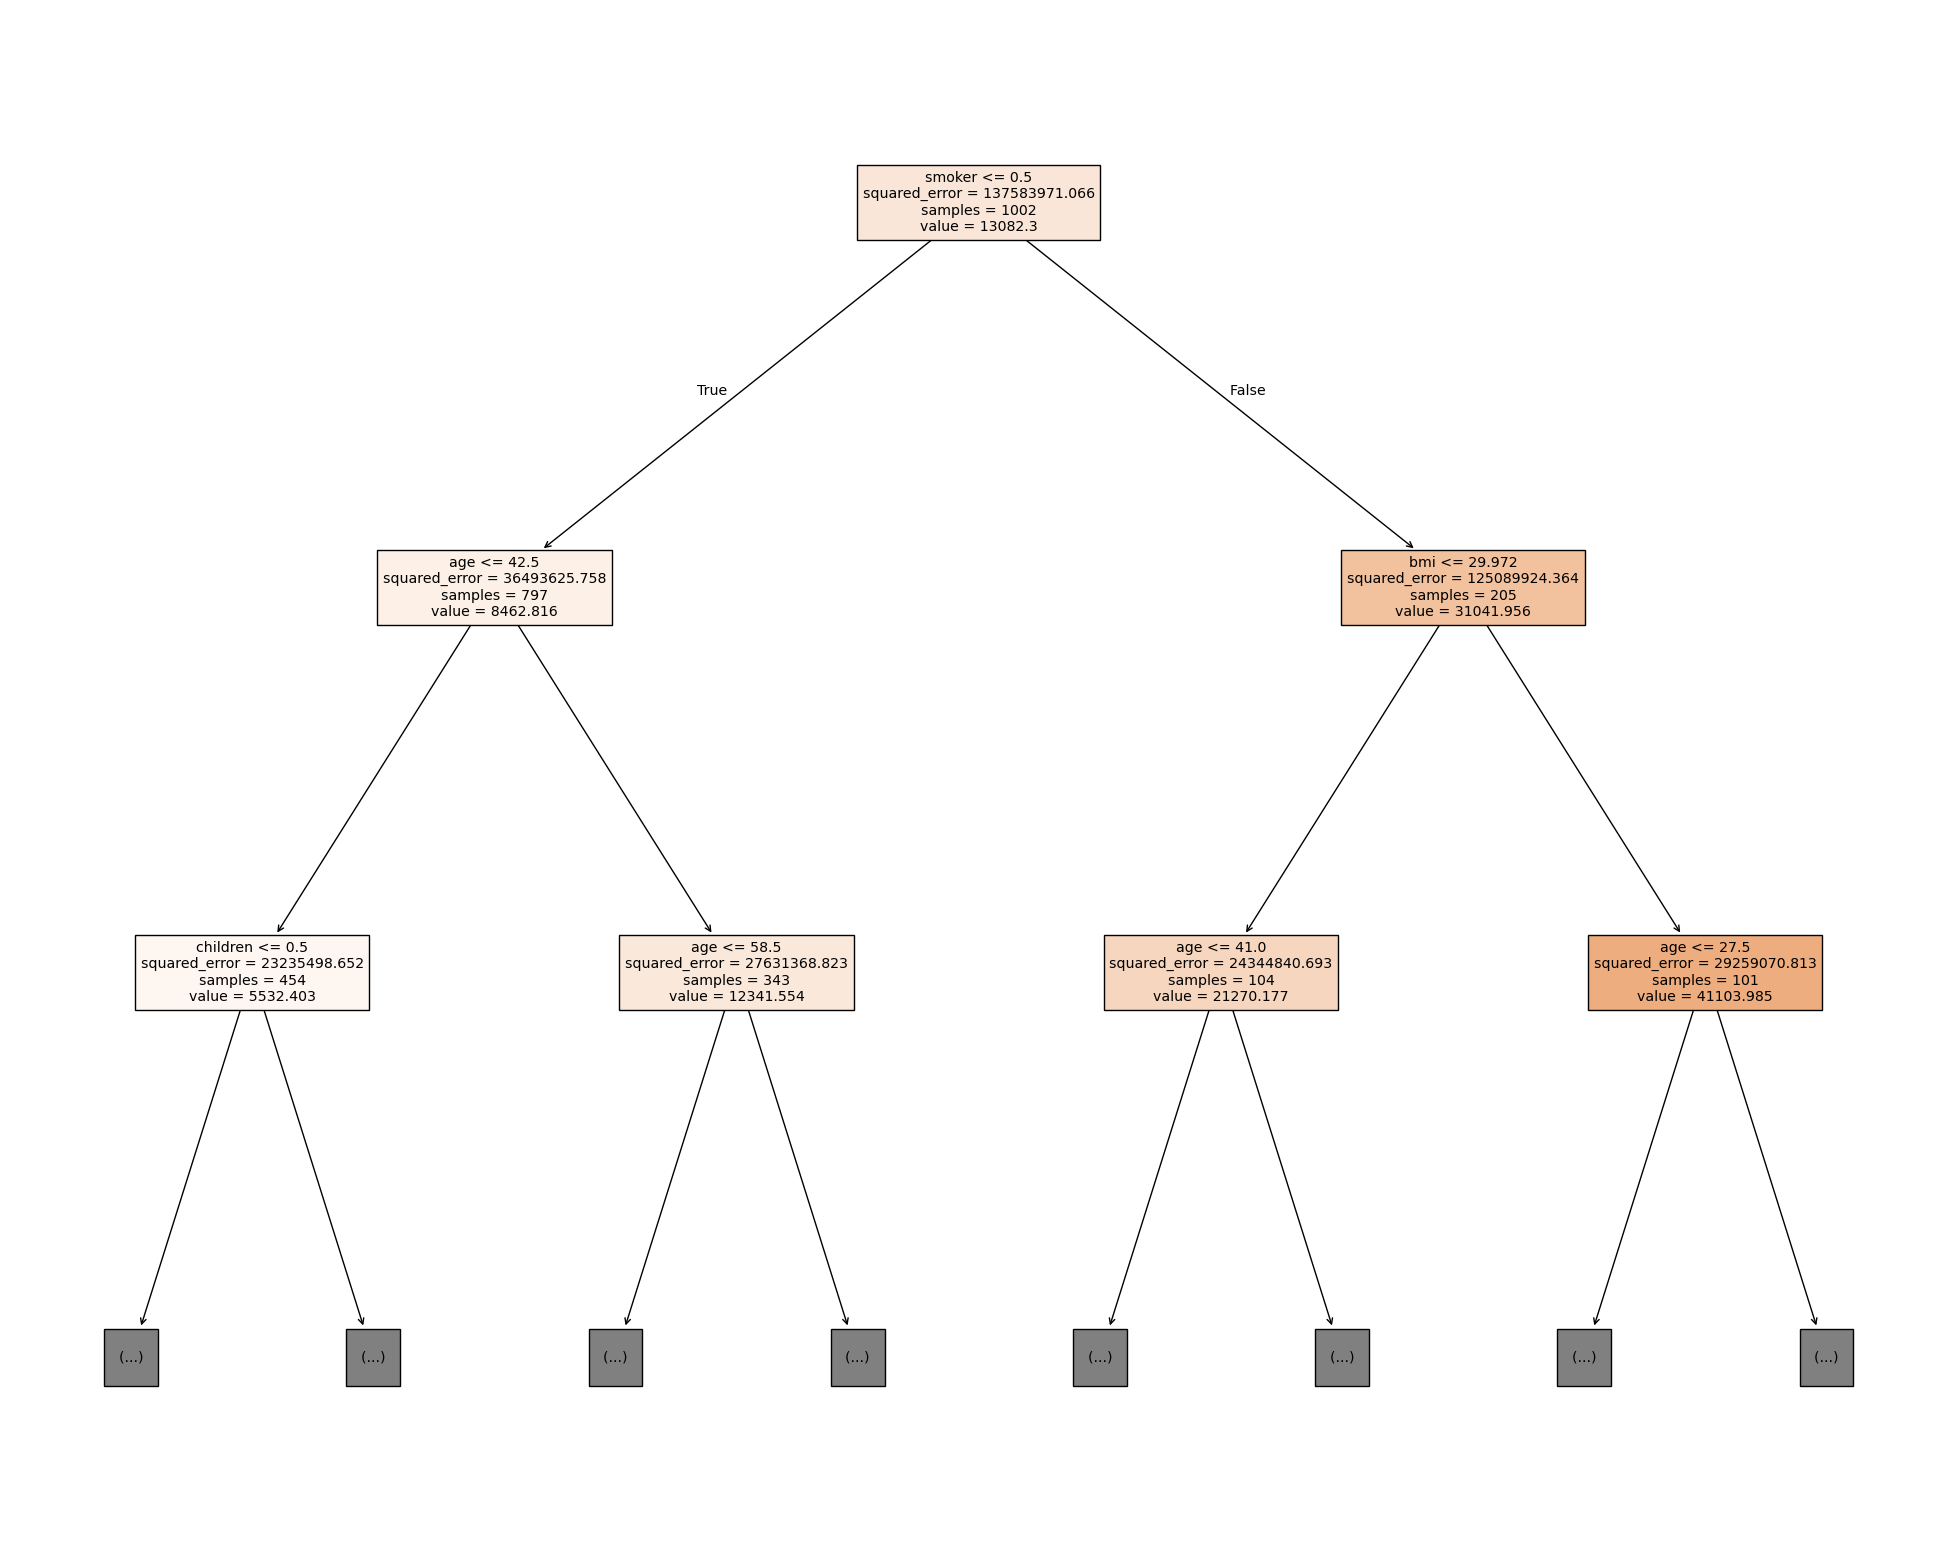

In [73]:
# Visualiza the decision tree
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(decision_tree, feature_names = list(X_train.columns), max_depth= 2, filled= True)

In [57]:
# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
# XGBoost
xg_boost = XGBRegressor()
xg_boost.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluation

Linear Regression

In [60]:
# Evaluation metrics on linear regression
lin_reg_train_pred = lin_reg.predict(X_train)
lin_reg_test_pred = lin_reg.predict(X_test)
lin_reg_train_mae = mean_absolute_error(y_train, lin_reg_train_pred)
lin_reg_train_mse = mean_squared_error(y_train, lin_reg_train_pred)
lin_reg_train_r2 = r2_score(y_train, lin_reg_train_pred)

print(f"Linear Regression - Training MAE: {lin_reg_train_mae}, MSE: {lin_reg_train_mse}, R2: {lin_reg_train_r2}")

lin_reg_test_mae = mean_absolute_error(y_test, lin_reg_test_pred)
lin_reg_test_mse = mean_squared_error(y_test, lin_reg_test_pred)
lin_reg_test_r2 = r2_score(y_test, lin_reg_test_pred)

print(f"Linear Regression - Testing MAE: {lin_reg_test_mae}, MSE: {lin_reg_test_mse}, R2: {lin_reg_test_r2}")



Linear Regression - Training MAE: 4209.449172543236, MSE: 37186472.06535739, R2: 0.7297179912948285
Linear Regression - Testing MAE: 4063.959185760238, MSE: 35228901.67560052, R2: 0.7962585193217646


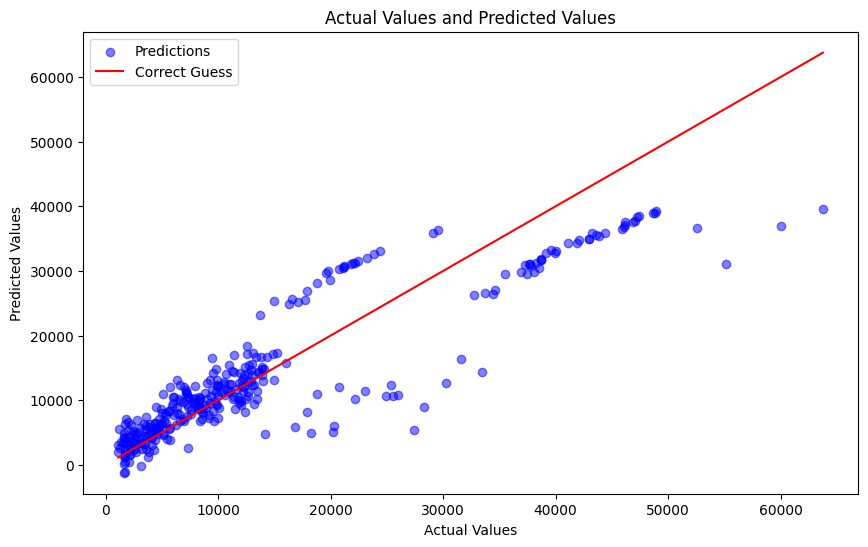

In [61]:
# Combine actual values and estimated values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, lin_reg_test_pred, color='blue', alpha= 0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Correct Guess')

plt.title("Actual Values and Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

Ridge Regression

In [62]:
ridge_reg_train_pred = ridge_reg.predict(X_train)
ridge_reg_train_mae = mean_absolute_error(y_train, ridge_reg_train_pred)
ridge_reg_train_mse = mean_squared_error(y_train, ridge_reg_train_pred)
ridge_reg_train_r2 = r2_score(y_train, ridge_reg_train_pred)

print(f"Ridge Regression - Training MAE: {ridge_reg_train_mae}, MSE: {ridge_reg_train_mse}, R2: {ridge_reg_train_r2}")

ridge_reg_test_pred = ridge_reg.predict(X_test)
ridge_reg_test_mae = mean_absolute_error(y_test, ridge_reg_test_pred)
ridge_reg_test_mse = mean_squared_error(y_test, ridge_reg_test_pred)
ridge_reg_test_r2 = r2_score(y_test, ridge_reg_test_pred)

print(f"Ridge Regression - Testing MAE: {ridge_reg_test_mae}, MSE: {ridge_reg_test_mse}, R2: {ridge_reg_test_r2}")


Ridge Regression - Training MAE: 4218.69723831728, MSE: 37189732.49541216, R2: 0.7296942935484303
Ridge Regression - Testing MAE: 4079.042634850759, MSE: 35375026.118356414, R2: 0.7954134288161191


Support Vector Regressor

In [63]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)
svr_train_mae = mean_absolute_error(y_train, svr_train_pred)
svr_train_mse = mean_squared_error(y_train, svr_train_pred)
svr_train_r2 = r2_score(y_train, svr_train_pred)
print(f"SVR - Training MAE: {svr_train_mae}, MSE: {svr_train_mse}, R2: {svr_train_r2}")

svr_test_mae = mean_absolute_error(y_test, svr_test_pred)
svr_test_mse = mean_squared_error(y_test, svr_test_pred)
svr_test_r2 = r2_score(y_test, svr_test_pred)
print(f"SVR - Testing MAE: {svr_test_mae}, MSE: {svr_test_mse}, R2: {svr_test_r2}")

SVR - Training MAE: 8120.461983478563, MSE: 151936585.80208573, R2: -0.10431894518571116
SVR - Testing MAE: 8890.455219947202, MSE: 193709542.427668, R2: -0.12029234857046633


Decision Tree

In [74]:
dt_train_pred = decision_tree.predict(X_train)
dt_test_pred = decision_tree.predict(X_test)
dt_train_mae = mean_absolute_error(y_train, dt_train_pred)
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_train_r2 = r2_score(y_train, dt_train_pred)
print(f"Decision Tree - Training MAE: {dt_train_mae}, MSE: {dt_train_mse}, R2: {dt_train_r2}")

dt_test_mae = mean_absolute_error(y_test, dt_test_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)
print(f"Decision Tree - Testing MAE: {dt_test_mae}, MSE: {dt_test_mse}, R2: {dt_test_r2}")

Decision Tree - Training MAE: 0.0, MSE: 0.0, R2: 1.0
Decision Tree - Testing MAE: 3166.098185131343, MSE: 44358958.30755387, R2: 0.7434560994791195


Random Forest

In [65]:
rf_train_pred = random_forest.predict(X_train)
rf_test_pred = random_forest.predict(X_test)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print(f"Random Forest - Training MAE: {rf_train_mae}, MSE: {rf_train_mse}, R2: {rf_train_r2}")
print(f"Random Forest - Testing MAE: {rf_test_mae}, MSE: {rf_test_mse}, R2: {rf_test_r2}")

Random Forest - Training MAE: 1047.874624718862, MSE: 3605025.196454663, R2: 0.9737976366830926
Random Forest - Testing MAE: 2629.748231172836, MSE: 22854075.664272565, R2: 0.867826614117911


XGBoost

In [66]:
xg_boost_train_pred = xg_boost.predict(X_train)
xg_boost_test_pred = xg_boost.predict(X_test)
xg_boost_train_mae = mean_absolute_error(y_train, xg_boost_train_pred)
xg_boost_test_mae = mean_absolute_error(y_test, xg_boost_test_pred)
xg_boost_train_mse = mean_squared_error(y_train, xg_boost_train_pred)
xg_boost_test_mse = mean_squared_error(y_test, xg_boost_test_pred)
xg_boost_train_r2 = r2_score(y_train, xg_boost_train_pred)
xg_boost_test_r2 = r2_score(y_test, xg_boost_test_pred)

print(f"XGBoost - Training MAE: {xg_boost_train_mae}, MSE: {xg_boost_train_mse}, R2: {xg_boost_train_r2}")
print(f"XGBoost - Testing MAE: {xg_boost_test_mae}, MSE: {xg_boost_test_mse}, R2: {xg_boost_test_r2}")

XGBoost - Training MAE: 421.13263199273337, MSE: 487476.4840705736, R2: 0.9964568802579723
XGBoost - Testing MAE: 2948.0328794175052, MSE: 26666244.67163947, R2: 0.8457794618873733


### Models Comparison

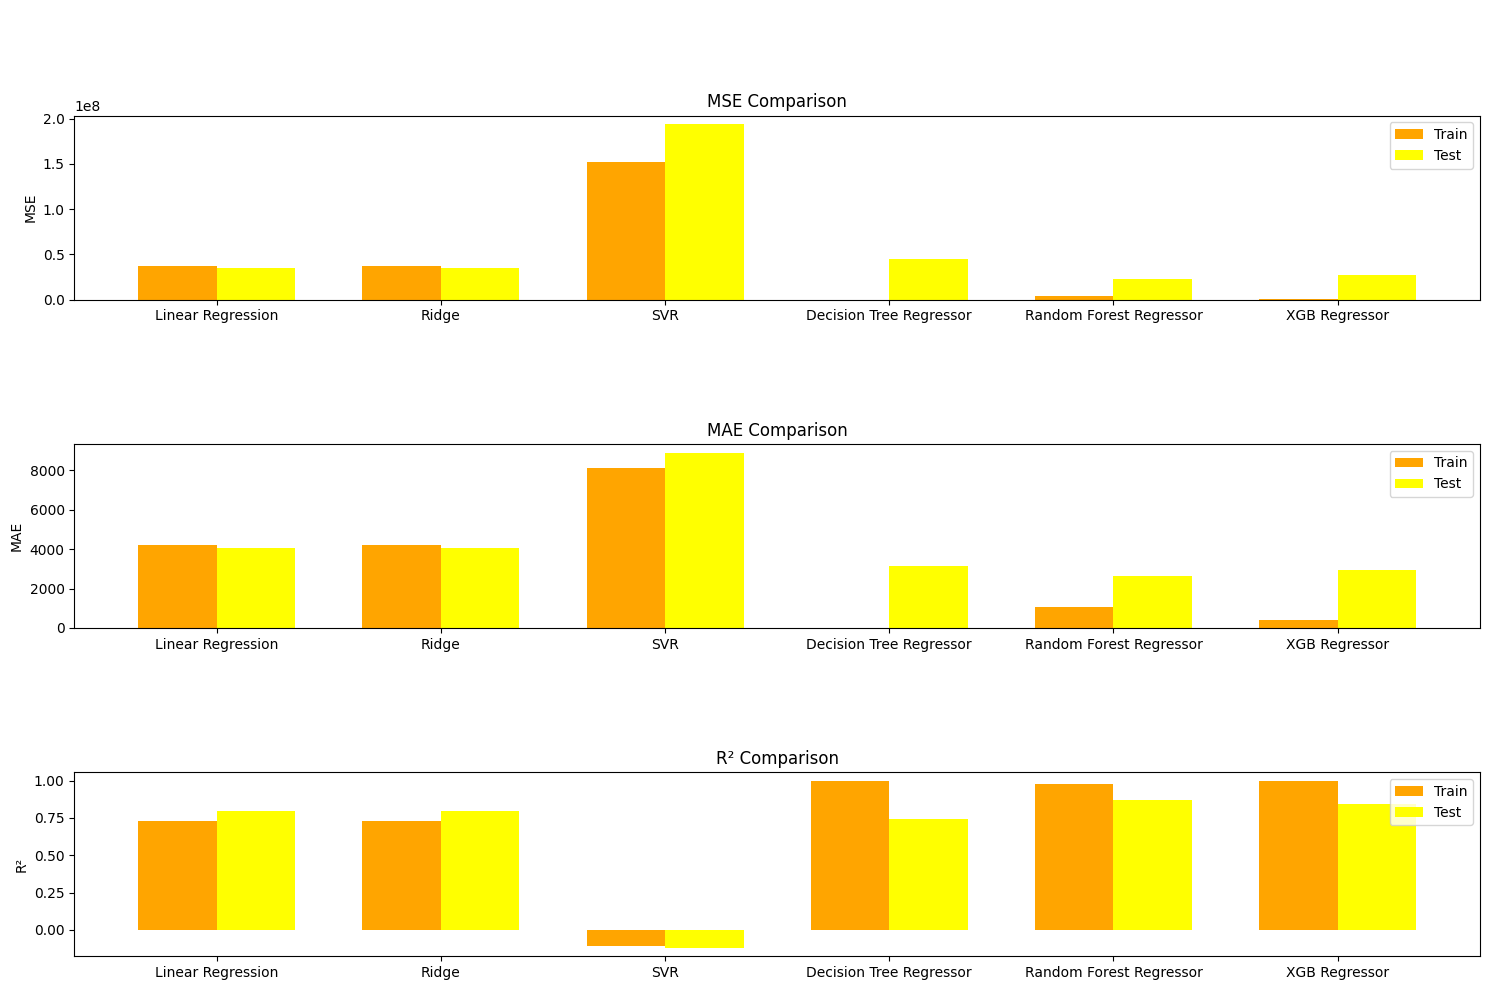

In [76]:
plt.figure(figsize=(15, 10))

names = ['Linear Regression', 'Ridge', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor']

mse_train = [lin_reg_train_mse, ridge_reg_train_mse, svr_train_mse, dt_train_mse, rf_train_mse, xg_boost_train_mse]
mse_test = [lin_reg_test_mse, ridge_reg_test_mse, svr_test_mse, dt_test_mse, rf_test_mse, xg_boost_test_mse]

mae_train = [lin_reg_train_mae, ridge_reg_train_mae, svr_train_mae, dt_train_mae, rf_train_mae, xg_boost_train_mae]
mae_test = [lin_reg_test_mae, ridge_reg_test_mae, svr_test_mae, dt_test_mae, rf_test_mae, xg_boost_test_mae]

r2_train = [lin_reg_train_r2, ridge_reg_train_r2, svr_train_r2, dt_train_r2, rf_train_r2, xg_boost_train_r2]
r2_test = [lin_reg_test_r2, ridge_reg_test_r2, svr_test_r2, dt_test_r2, rf_test_r2, xg_boost_test_r2]

list_train = [mse_train, mae_train, r2_train]
list_test = [mse_test, mae_test, r2_test]
list_metrics = ['MSE', 'MAE', 'R²']

for i in range(len(list_metrics)):
    x = np.arange(len(names))
    width = 0.35

    plt.subplot(3,1,i+1)

    train_data = list_train[i]
    test_data = list_test[i]

    plt.bar(x-width/2, train_data, width, label="Train", color='orange')
    plt.bar(x+width/2, test_data, width, label="Test", color="yellow")

    plt.ylabel(list_metrics[i])
    plt.xticks(x, names)
    plt.legend()
    plt.title(f"\n\n\n\n{list_metrics[i]} Comparison")

plt.tight_layout()
plt.show()